<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Beyond the Fundamental: A Spectral Adventure </b></h3>

**Автор**: Ермекова Асель

*P.S.* *На русском перевод емкого и классного названия не получился у меня. Если у вас есть идеи как назвать эту домашку прикольно, пишите в чатике в телеграме ваши предложения русского варианта названия домашки!*

# **Homework: Beyond the Fundamental: A Spectral Adventure**

## **Introduction**

**Что делает скрипку похожей на скрипку?**

Вы когда-нибудь задумывались, почему скрипка, флейта и гитара звучат совершенно по-разному, даже играя одну и ту же ноту на одинаковой громкости?

Ответ кроется в фундаментальном свойстве звука, называемом тембром. Тембр — это «цвет» или «текстура» звука — то, что позволяет вам мгновенно отличить трубу от фортепиано или голос вашего друга от голоса незнакомца, даже если они поют в одной тональности.

**Но что физически создаёт тембр?**

Всё сводится к гармоникам — смеси частот, сопровождающих основной тон, — и тому, как их амплитуды и фазы изменяются с течением времени. Два инструмента, играющие ноту Ля или А4 (A4 — это нота Ля первой октавы с частотой 440 Гц), оба воспроизводят эту основную частоту, но также генерируют разные наборы обертонов или гармоник (2×440 Гц, 3×440 Гц и т. д.) с уникальной интенсивностью и паттернами. Этот спектральный «отпечаток» называют тембром.

В этом домашнем задании вы станете аудиодетективом. Используя реальные записи разных инструментов, вы:

* Проанализируете их частотные спектры, чтобы увидеть, чем отличаются гармоники,
* Узнаете, почему выбор оконной функции важен при вычислении спектрограмм,
* Реализуете Mel-спектрограмму — представление, имитирующее человеческий слух,
* Обучите простой классификатор распознавать инструменты по их тембру.

Давайте приступим!

Домашнее задание будет состоять из 3 заданий:

* **Task 1.** **Harmonic and Frequency Spectrum Analysis.** Анализ гармонического и частотного спектра различных инструментов.

* **Task 2.** **Windowing in STFT – Why Not Rectangular?** Анализ оконных функций для STFT и почему нам нужны другие формы оконной функции.

* **Task 3.** **Implement Your Own Mel-Spectrogram Transform.** Напишите свою собственную функцию, которая преобразует спектрограмму в мел-спектрограмму и сравнивает с мел-спектрограммой из librosa.

## **Submission Instructions**

- Отправьте **Jupyter Notebook** с:
  - Всем кодом
  - Графиками
  - Ответами на вопросы
- Назовите его: `DLS_HW2_Spectrograms_<ваше_имя>.ipynb`

Домашнее задание будет проверяться в формате peer-review, т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.

# **Load libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import stft
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')

# **Task 1: Harmonic and Frequency Spectrum Analysis** [6 score]

### **Цель**: Понять, как разные инструменты создают разные гармонические структуры для одной и той же высоты звука → это и есть **тембр**.



### **1.1 Load a WAV file** [0.5 score]
- Download file `Vn-ord-A5-pp-1c-N.wav`
- Use `librosa.load(path, sr=None)` to load the audio. Keep the original sampling rate.
- Print the sampling rate and duration.

In [ ]:
!gdown 1JOFNfzNzV5RTDv6YBFZ0lKZRfyoukW7O # download violin playing A5: Vn-ord-A5-pp-1c-N.wav

In [2]:
# Example: Load violin A5
audio_path = 'Vn-ord-A5-pp-1c-N.wav'
signal, sr = librosa.load(audio_path)  # Keep original sampling rate

print(f"Sampling rate: {sr} Hz")
print(f"Duration: {len(signal)/sr:.2f} seconds")

Sampling rate: 22050 Hz
Duration: 7.93 seconds


### **1.2 Compute the Fourier Transform and plot the magnitude spectrum** [1 score]
- Compute the FFT of the entire audio signal. Use `np.fft.rfft` and `np.fft.rfftfreq`.
- Compute absolute values of the magnitude with `np.abs()` and normalize it.
- Plot the magnitude spectrum (only up to Nyquist frequency).
- Label axes: frequency (Hz) vs magnitude.

> 💡 **Tip**: Normalize magnitude by dividing by `len(signal)`.

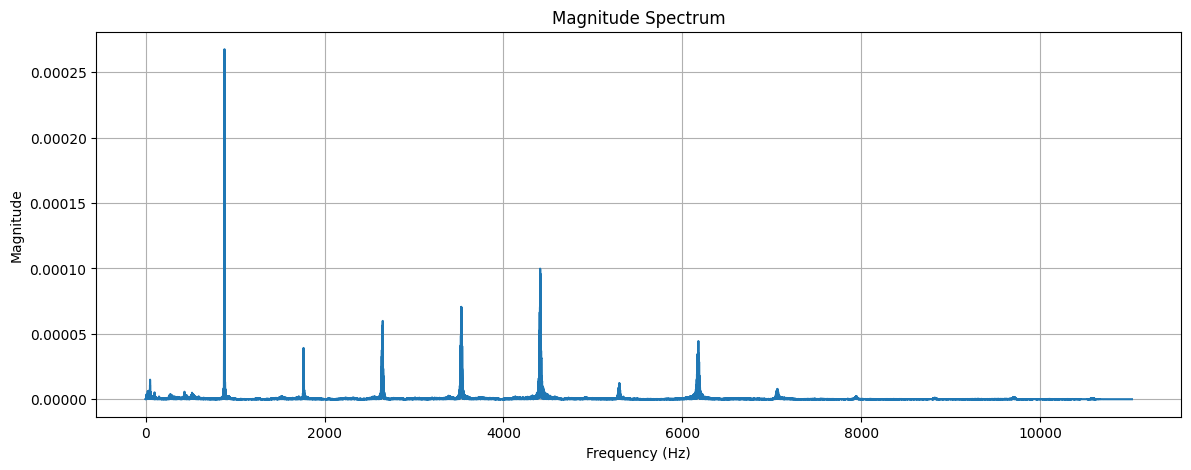

In [3]:
fft_result = np.fft.rfft(signal)
fft_freq = np.fft.rfftfreq(len(signal), 1/sr)
magnitude = np.abs(fft_result) / len(signal)
plt.figure(figsize=(14, 5))
plt.grid(True)
plt.plot(fft_freq, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.show()

### **1.3 Identify and plot harmonics** [0.5 score]
- Find the **fundamental frequency** (f₀) corresponding to the pitch of A5 note (for example, the fundamental frequency for the note A4 is 440 Hz.).
- Calculate harmonics f₀, 2f₀, 3f₀, ..., up to 5000 Hz.
- Plot harmonics as vertical dashed lines and annotate them (e.g., "1st harmonic", "2nd harmonic").

> 📌 **Hint**: You can get theoretical f₀ from `librosa.note_to_hz('A4')`.

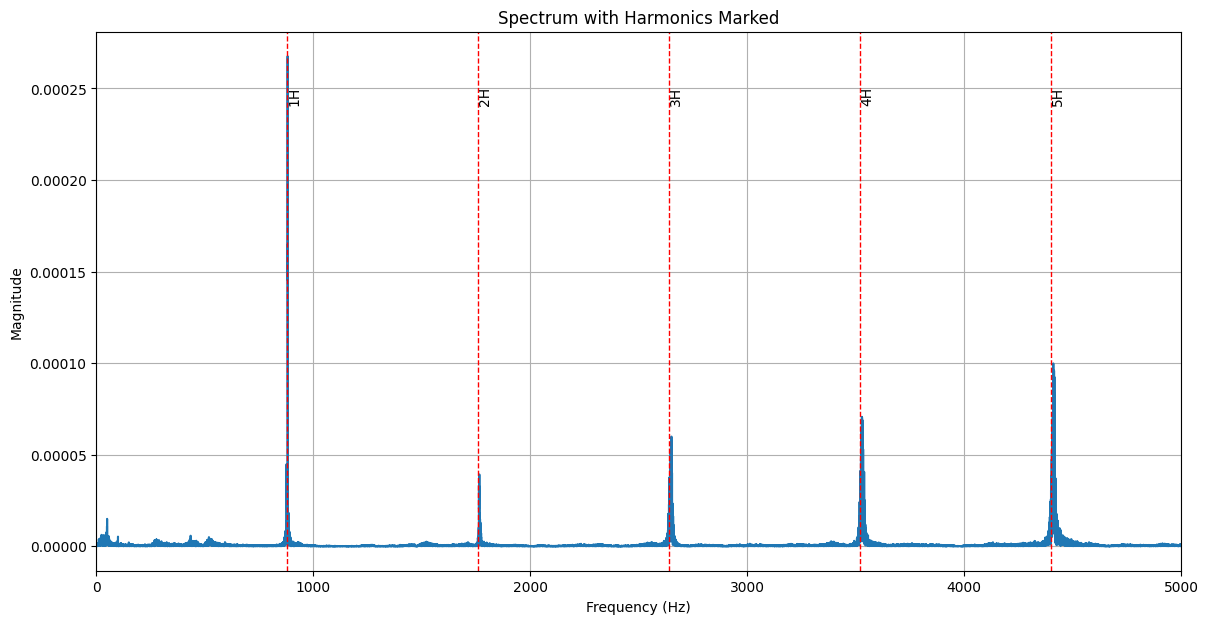

In [4]:
f0 = librosa.note_to_hz('A5')
max_freq = 5000
harmonics = []
n = 1
while n * f0 <= max_freq:
    harmonics.append(n * f0)
    n += 1

# Plot with harmonics marked
plt.figure(figsize=(14, 7))
plt.grid(True)
plt.title('Spectrum with Harmonics Marked')
plt.xlim(0, 5000)
plt.plot(fft_freq, magnitude)
for id, h in enumerate(harmonics):
    plt.axvline(x=h, color='red', linestyle='--', linewidth=1)
    y_pos = max(magnitude) * 0.9  
    plt.text(h, y_pos, f'{id+1}H', rotation=90, verticalalignment='bottom', horizontalalignment='left')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

### **1.4 Answer: What is the fundamental frequency? What are the amplitudes of the 2nd, 3rd, and 5th harmonics?** [1 score]
- What is the fundamental frequency?
- What are the amplitudes of the 2nd, 3rd, and 5th harmonics?
- Report numerical values (in Hz and amplitude).
- Is the strongest peak always at f₀?

- **What is the fundamental frequency?**

  Основная (фундаментальная) частота — это наинизшая частота сигнала, соответствующая первому гармоническому колебанию. Она определяется как частота максимума амплитудного спектра (кроме нулевой частоты). 

- **What are the amplitudes of the 2nd, 3rd, and 5th harmonics?**

  Амплитуды гармоник вычисляются как значения амплитудного спектра в точках, кратных фундаментальной частоте: $2f_0, 3f_0, 5f_0$. 

- **Is the strongest peak always at $f_0$?**

  Нет, самый сильный пик в спектре не всегда приходится на фундаментальную частоту. В некоторых сигналах более высокая гармоника может иметь большую амплитуду, особенно если сигнал содержит сложные гармонические компоненты или форму волны, отличающуюся от чистой синусоиды. Поэтому для точного определения $f_0$ иногда требуется дополнительный анализ или знание свойств источника звука.

In [5]:
len(fft_freq)

87388

In [6]:
# Find peaks near harmonic frequencies
def get_harmonic_amplitude(freq, spectrum, freqs):
    idx = (np.abs(freqs - freq)).argmin()
    return max(spectrum[idx-100:idx+100])

fundamental_amp = get_harmonic_amplitude(f0, magnitude, fft_freq)
second_harm_amp = get_harmonic_amplitude(2*f0, magnitude, fft_freq)
third_harm_amp = get_harmonic_amplitude(3*f0, magnitude, fft_freq)
fifth_harm_amp = get_harmonic_amplitude(5*f0, magnitude, fft_freq)

print(f"Fundamental frequency (f0): {f0:.1f} Hz")
print(f"Fundamental amplitude: {fundamental_amp:.5f}")
print(f"2nd harmonic amplitude: {second_harm_amp:.5f}")
print(f"3rd harmonic amplitude: {third_harm_amp:.5f}")
print(f"5th harmonic amplitude: {fifth_harm_amp:.5f}")

Fundamental frequency (f0): 880.0 Hz
Fundamental amplitude: 0.00027
2nd harmonic amplitude: 0.00004
3rd harmonic amplitude: 0.00006
5th harmonic amplitude: 0.00010


### **1.5 Repeat for another instruments playing the same pitch** [1 score]
- Choose a different instruments.
- Repeat steps 1.1–1.3.
- **Compare** the two spectra (Violin and another instrument):
  - Are the harmonic amplitudes similar?
  - Which instrument has more high-frequency harmonics?
  - How does this relate to timbre?

In [ ]:
!gdown 19RVoksj40dds4lfSiha17HuTLYCFvwCs # Cello: Vc-ord-A5-pp-1c-N.wav
!gdown 1gVMlgMg9wGyPGRIbu7e_Q67JfzU0Rn1E # Accordion: Acc-ord-A5-pp-N-N.wav
!gdown 1gstlGhDe7SYEMpHQV6N50zb8TPByL2gI # Flute: Fl-ord-A5-pp-N-N.wav

In [7]:
database = {'Accordion': 'Acc-ord-A5-pp-N-N.wav',
            'Cello': 'Vc-ord-A5-pp-1c-N.wav',
            'Flute': 'Fl-ord-A5-pp-N-N.wav',
            'Violin': 'Vn-ord-A5-pp-1c-N.wav'}

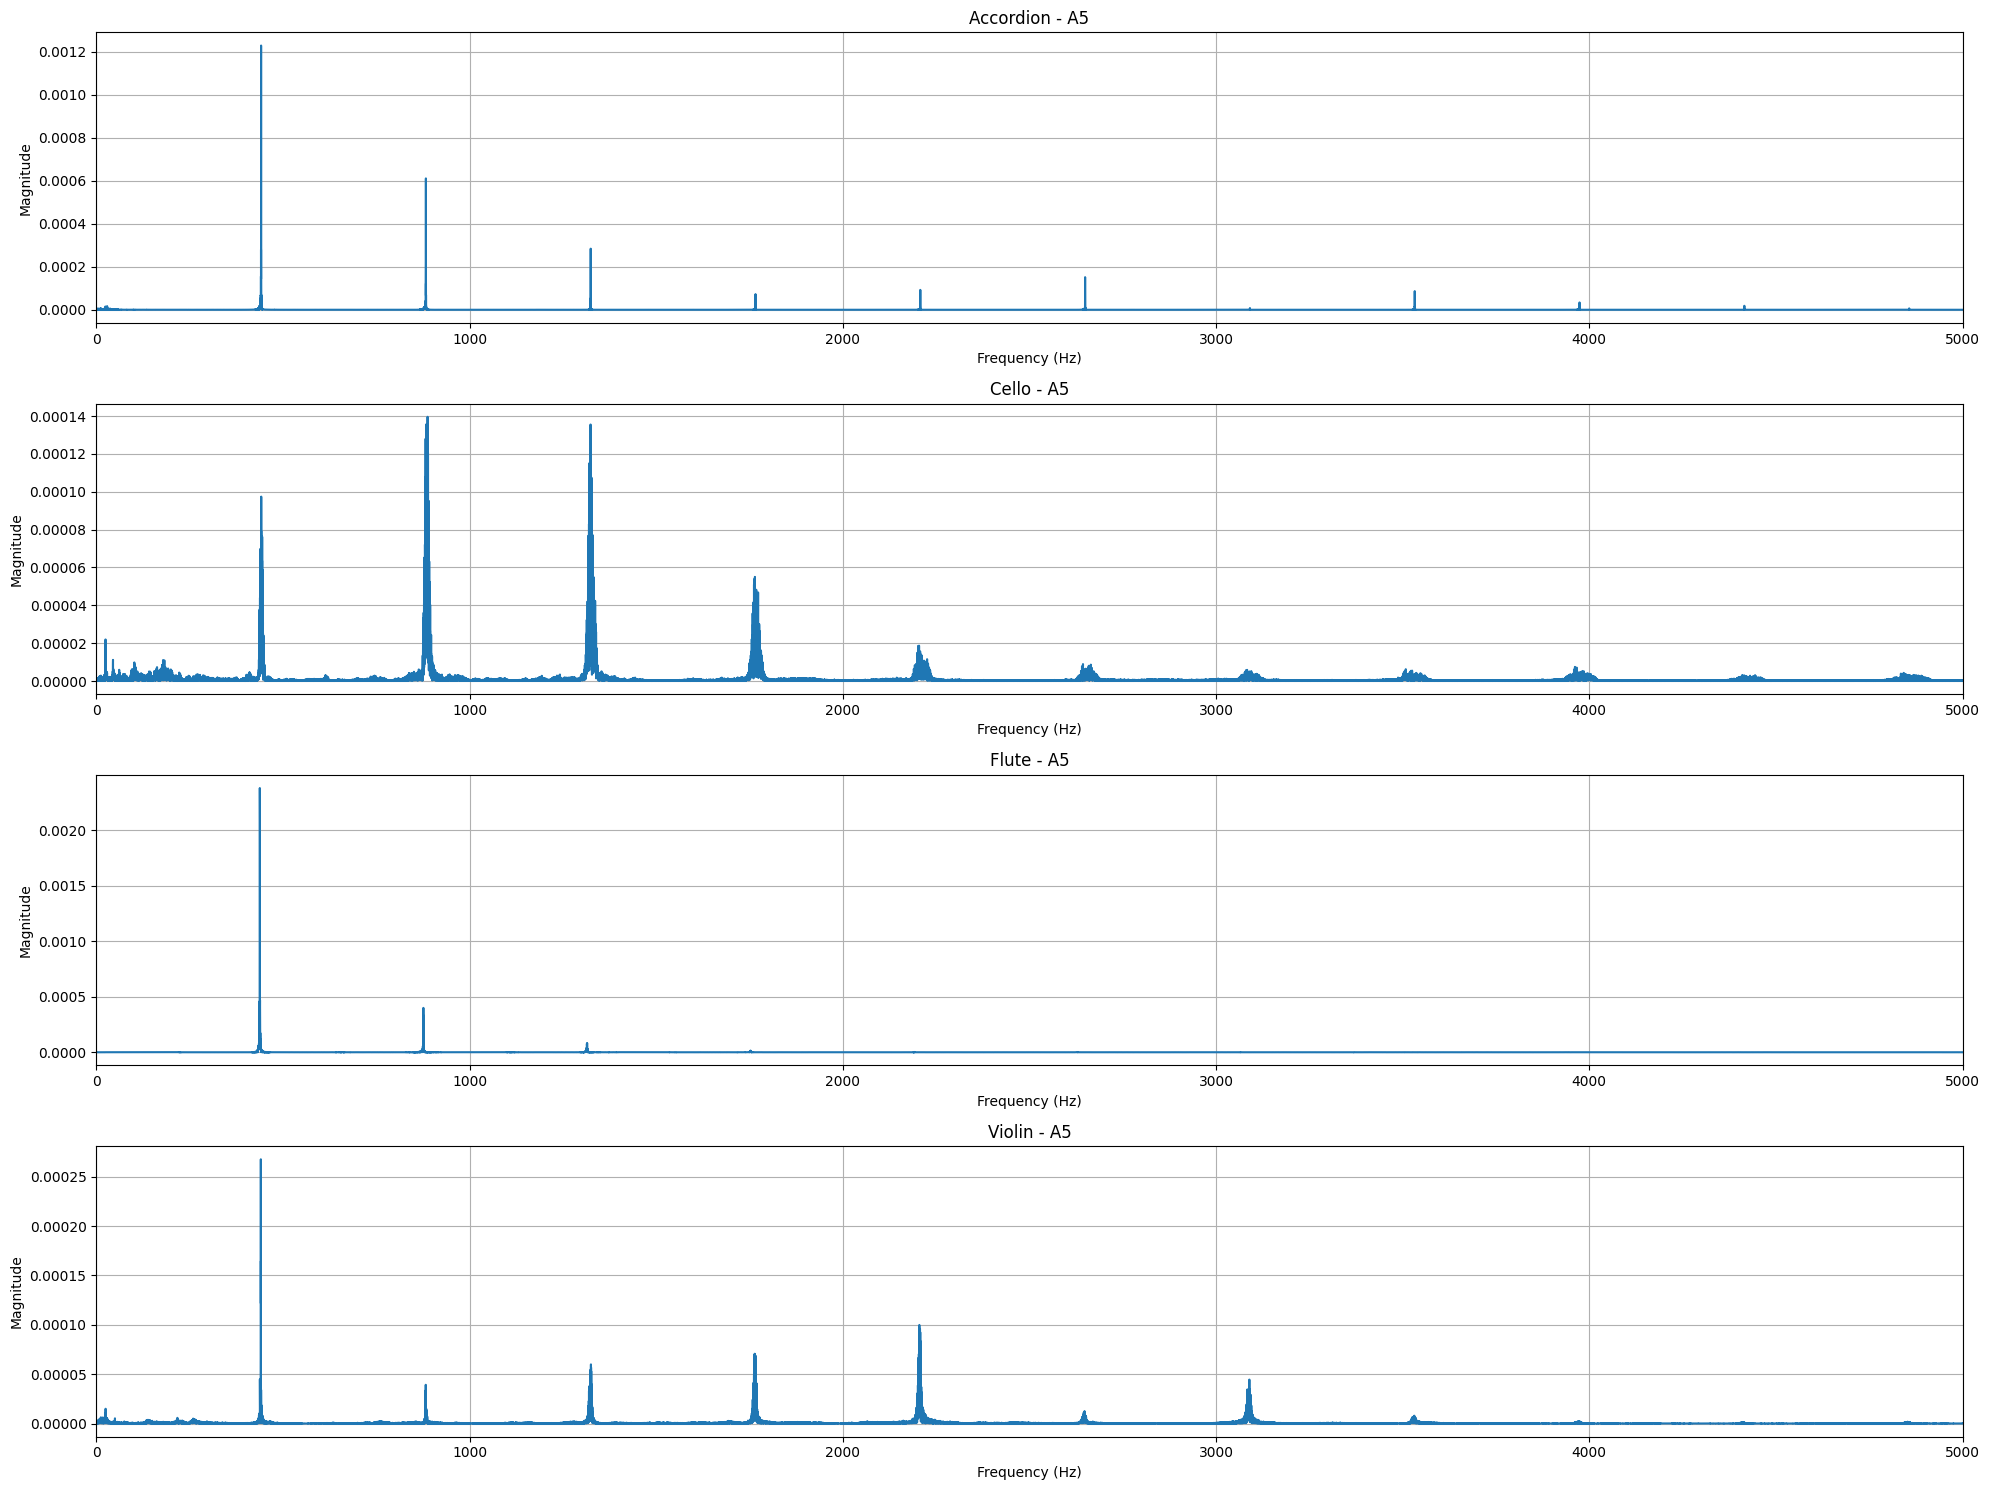

In [8]:
instruments_to_compare = ['Accordion', 'Cello', 'Flute', 'Violin']
plt.figure(figsize=(20, 15))

for i, inst in enumerate(instruments_to_compare):

    path_to_wav = database[inst]
    y_inst, sr_inst = librosa.load(path_to_wav, sr=None)

    # Compute FFT
    Y_inst = np.fft.rfft(y_inst)
    # Get frequencies
    freqs_inst = np.fft.rfftfreq(len(y_inst), 1/sr)
    # Extract magnitude and normalize it
    magnitude_inst = np.abs(Y_inst) / len(y_inst)

    plt.subplot(4, 1, i+1)
    plt.plot(freqs_inst, magnitude_inst)
    plt.xlim(0, 5000)
    plt.title(f'{inst.capitalize()} - A5')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Analysis:
# - Violin: rich in high harmonics, complex spectrum
# - Flute: mostly fundamental, few weak harmonics
# - Guitar: strong fundamental and lower harmonics, decaying higher harmonics
# This difference in harmonic content IS timbre!

### **1.6 Count significant harmonics** [1 score]
- Define a "significant harmonic" as one with amplitude > 10% of the max amplitude.
- For **Flute** and **Violin** (same pitch), count how many significant harmonics each has.
- Which instrument is "brighter"? Why?

In [9]:
def count_significant_harmonics(magnitude, freqs, f0, max_freq=5000, threshold_ratio=0.1):
    f0_amplitude = get_harmonic_amplitude(f0, magnitude, freqs)
    harmonic_amplitudes = []
    n = 1
    while f0 * n < max_freq:
        harmonic_amplitudes.append(get_harmonic_amplitude(f0 * n, magnitude, freqs))
        n += 1
    harmonics = list(filter(lambda x: x > f0_amplitude * threshold_ratio, harmonic_amplitudes))
    return len(harmonics), harmonics

# Compare Flute and violin
for inst in ['Flute', 'Violin']:
    path_to_wav = database[inst]
    y_inst, sr_inst = librosa.load(path_to_wav, sr=None)
    # Compute FFT
    Y_inst = np.fft.rfft(y_inst)
    # Get frequencies
    freqs_inst = np.fft.rfftfreq(len(y_inst), 1/sr_inst)
    # Extract magnitude and normalize it
    magnitude_inst = np.abs(Y_inst) / len(y_inst)

    count, harm_list = count_significant_harmonics(magnitude_inst, freqs_inst, f0)
    print(f"{inst.capitalize()}: {count} significant harmonics")

Flute: 2 significant harmonics
Violin: 5 significant harmonics


**Define a "significant harmonic" as one with amplitude > 10% of the max amplitude.**
[np.float32(0.0023787643), np.float32(0.00039956407)]
[np.float32(0.00026759028), np.float32(3.9205665e-05), np.float32(5.987416e-05), np.float32(7.065193e-05), np.float32(9.9817524e-05)]

**For **Flute** and **Violin** (same pitch), count how many significant harmonics each has.**
Flute: 2 significant harmonics
Violin: 5 significant harmonics

**Which instrument is "brighter"? Why?**  
Скрипка звучит "ярче", это связано с тем что у неё больше значимых гармоник

### **1.7. Simple Instrument Classification** [2 score]
- Use dataset `TinySOL_short` provided below with 3 instruments of the **same pitch** A5.
- **Approach A**: Use raw audio waveforms (flattened) as features → train a Random Forest.
- **Approach B**: Use magnitude spectrum (first 1024 bins) as features → train same model.
- Compare accuracy on a test set.
- **Question**: Why does Approach B perform better?

> 🛠️ Use `sklearn.tree.RandomForestClassifier` and `train_test_split`.

First, download dataset.

In [ ]:
!gdown --folder 1wMa4fDtWRtO-YAz-gY5Jdrl94GQZUwmO # download dataset

In [10]:
df = pd.read_csv("TinySOL_short/TinySOL_short.csv")
df

,Path,Fold,Family,Instrument (abbr.),Instrument (in full),Technique (abbr.),Technique (in full),Pitch,Pitch ID,Dynamics,Dynamics ID,Instance ID,String ID (if applicable),Needed digital retuning
0,TinySOL_short/Strings/Violoncello/ordinario/Vc...,0,Strings,Vc,Cello,ord,ordinario,A5,81,pp,0,0,1.0,False
1,TinySOL_short/Strings/Violoncello/ordinario/Vc...,3,Strings,Vc,Cello,ord,ordinario,A5,81,mf,2,0,1.0,False
2,TinySOL_short/Strings/Violoncello/ordinario/Vc...,4,Strings,Vc,Cello,ord,ordinario,A5,81,ff,4,0,1.0,True
3,TinySOL_short/Strings/Violin/ordinario/Vn-ord-...,4,Strings,Vn,Violin,ord,ordinario,A5,81,pp,0,0,1.0,False
4,TinySOL_short/Strings/Violin/ordinario/Vn-ord-...,4,Strings,Vn,Violin,ord,ordinario,A5,81,pp,0,1,2.0,False
5,TinySOL_short/Strings/Violin/ordinario/Vn-ord-...,2,Strings,Vn,Violin,ord,ordinario,A5,81,pp,0,2,3.0,False
6,TinySOL_short/Strings/Violin/ordinario/Vn-ord-...,1,Strings,Vn,Violin,ord,ordinario,A5,81,mf,2,0,1.0,False
7,TinySOL_short/Strings/Violin/ordinario/Vn-ord-...,3,Strings,Vn,Violin,ord,ordinario,A5,81,mf,2,1,2.0,False
8,TinySOL_short/Strings/Violin/ordinario/Vn-ord-...,1,Strings,Vn,Violin,ord,ordinario,A5,81,mf,2,2,3.0,False
9,TinySOL_short/Strings/Violin/ordinario/Vn-ord-...,3,Strings,Vn,Violin,ord,ordinario,A5,81,ff,4,0,1.0,False


In [11]:
pd.value_counts(df['Instrument (in full)'])

Instrument (in full)
Violin    9
Cello     3
Flute     3
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare data for 3 instruments, same pitch (A5)
instruments_class = ['Violin', 'Flute', 'Cello']
X_wave = [librosa.load(path) for path in df['Path']]
max_len = 0
for signal, sr in X_wave:
    max_len = max(max_len, len(signal))

X_wave_new = []
X_spec_new = []
for signal, sr in X_wave:
    X_wave_new.append(np.append(signal, np.zeros(max_len - len(signal))))
    magnitude = np.fft.rfft(signal)[:1024]
    magnitude = np.abs(magnitude) / len(signal)
    X_spec_new.append(magnitude)


X_wave = np.array(X_wave_new)
X_spec = np.array(X_spec_new)

y_labels = np.array([label for label in df['Instrument (in full)']])

# Split data
X_wave_train, X_wave_test, X_spec_train, X_spec_test, y_train, y_test = train_test_split(X_wave, X_spec, y_labels, test_size=0.3, random_state=11, stratify=y_labels)
print(X_spec_train.shape, X_wave_train.shape)

# Train classifiers
clf_wave = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=2)
clf_wave.fit(X_wave_train, y_train)
clf_spec = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=2)
clf_spec.fit(X_spec_train, y_train)

# Evaluate

y_wave_pred = clf_wave.predict(X_wave_train)
y_spec_pred = clf_spec.predict(X_spec_train)
acc_wave = accuracy_score(y_train, y_wave_pred)
acc_spec = accuracy_score(y_train, y_spec_pred)

print(f"Train accuracy with raw waveforms: {acc_wave:.3f}")
print(f"Train accuracy with spectra: {acc_spec:.3f}")

y_wave_pred = clf_wave.predict(X_wave_test)
y_spec_pred = clf_spec.predict(X_spec_test)
acc_wave = accuracy_score(y_test, y_wave_pred)
acc_spec = accuracy_score(y_test, y_spec_pred)

print(f"Test accuracy with raw waveforms: {acc_wave:.3f}")
print(f"Test accuracy with spectra: {acc_spec:.3f}")

(10, 1024) (10, 188223)
Train accuracy with raw waveforms: 0.900
Train accuracy with spectra: 0.900
Test accuracy with raw waveforms: 0.400
Test accuracy with spectra: 0.800


Параметры для модели подбирал так, чтоб не было переобучения

**Answer**: Знаем, что файл - нота, поэтому на всем промежутке звук не отличается. Отсюда следует что FT работает корректно без скользящего окна. Отсюда следует, что FT из длинного сигнала выявляет корректные признаки для модели. Спект магнитуды более информативен, если раскрыть мысль, то признакам на частотах с гармониками присваиваются некие веса в то время как остальные "игноририруются".

# **Task 2: Windowing in STFT – Why Not Rectangular?** [10 score]

### **Goal**: Understand spectral leakage and why smooth windows (e.g., Hann) are preferred.

### **2.1 Load a pure sine wave** [0.5 score]
- Generate a 440 Hz sine wave, 1 second long, at 22050 Hz sampling rate.
- Plot the waveform.

$$y = \sin(2 \pi ft)$$

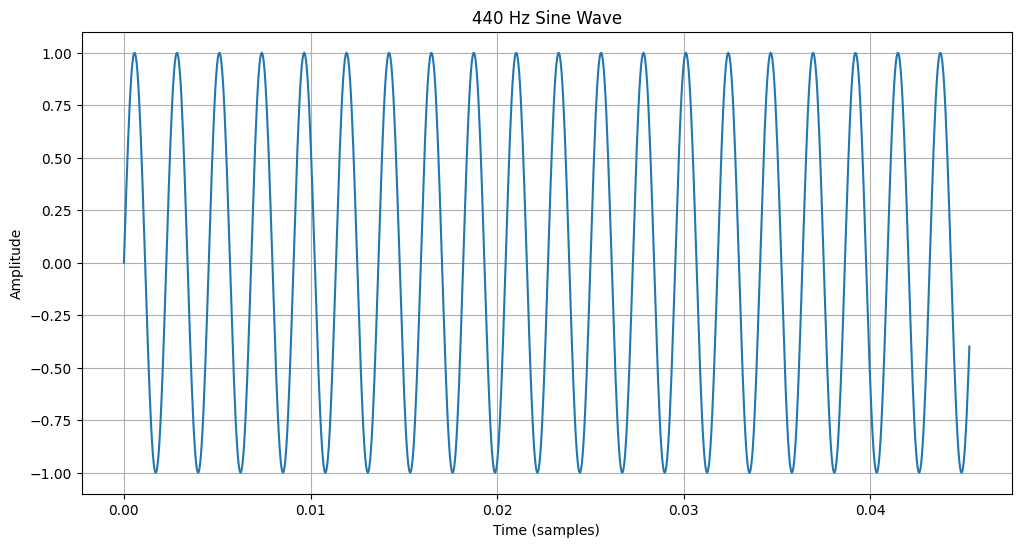

In [13]:
sr = 22050
duration = 1.0
t = np.linspace(0, duration, int(sr * duration), endpoint=False)
f0 = 440
sine_wave = [np.sin(2*np.pi*f0*i) for i in t]

# Plot waveform and Show first 1000 samples
plt.figure(figsize=(12, 6))
plt.plot(t[:1000], sine_wave[:1000])
plt.grid(True)
plt.title('440 Hz Sine Wave')
plt.ylabel('Amplitude')
plt.xlabel('Time (samples)')
plt.show()

### **2.2 Compute STFT with rectangular window** [1 score]
- Use `scipy.signal.stft` with `window='boxcar'` (rectangular), `nperseg=1024`, `noverlap=512`.
- Plot the spectrogram (use `plt.pcolormesh` with dB scale).

> 💡 Convert to dB: `10 * np.log10(np.abs(Zxx) + 1e-10)`

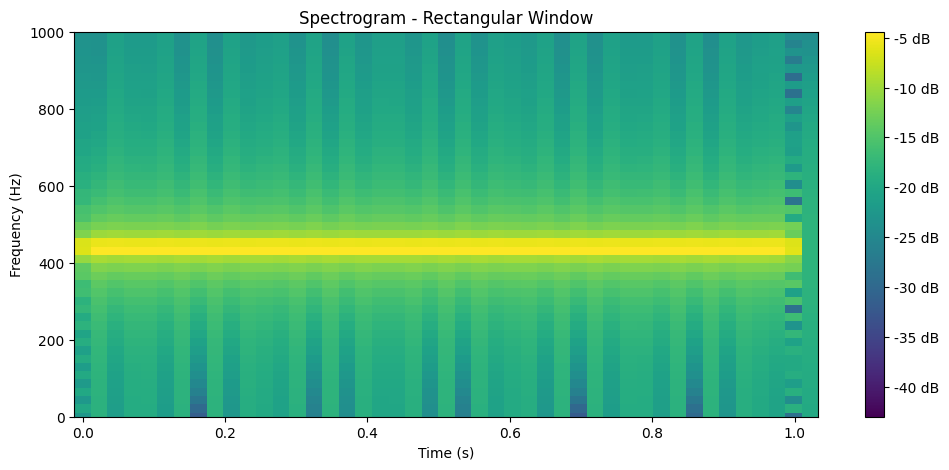

In [14]:
from scipy.signal import stft
# Compute STFT with rectangular window
f, t, Zxx = stft(sine_wave, sr, window='boxcar', nperseg=1024, noverlap=512)
Zxx = 10 * np.log10(np.abs(Zxx) + 1e-10)

plt.figure(figsize=(12, 5))
librosa.display.specshow(Zxx, x_coords=t, y_coords=f, 
                         x_axis='linear', y_axis='linear', cmap='viridis')
plt.colorbar(format='%2.0f dB')
plt.ylim(0, 1000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram - Rectangular Window')
plt.show()

### **2.3 Compute STFT with Hann window** [1 score]
- Repeat with `window='hann'`.
- Plot the spectrogram.

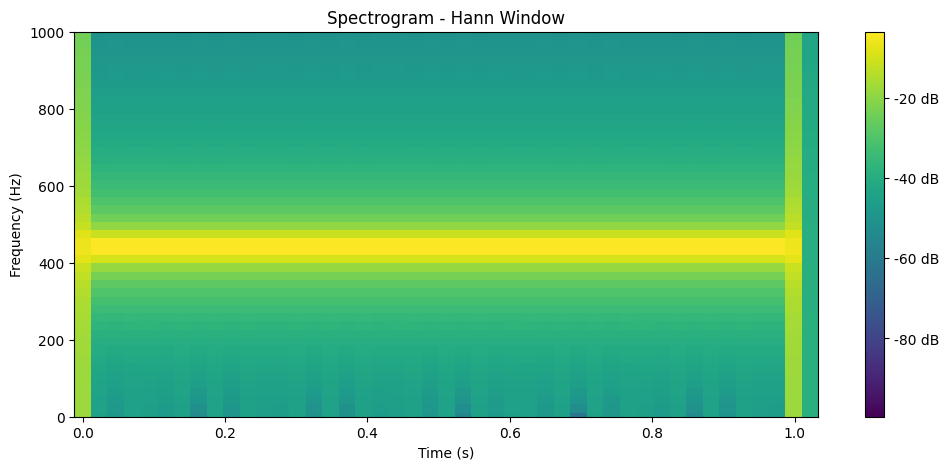

In [15]:
from scipy.signal import stft

# Compute STFT with rectangular window
f, t, Zxx = stft(sine_wave, sr, window='hann', nperseg=1024, noverlap=512)
Zxx = 10 * np.log10(np.abs(Zxx) + 1e-10)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Zxx, x_coords=t, y_coords=f, 
                         x_axis='linear', y_axis='linear', cmap='viridis')
plt.colorbar(format='%2.0f dB')
plt.ylim(0, 1000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram - Hann Window')
plt.show()

### **2.4 Compare the two spectrograms** [1.5 score]
- **Question**: In the rectangular case, do you see energy at frequencies **other than 440 Hz**? [0.5 score]
- **Answer**: Значимых всплесков магнитуды, кроме частоты 440 Гц нет, но магнитуда на других частотах неравномерна, но на деле они не влияют. Если выбрать окно Hann то эти недостатки нивелируются.

- **Question**: Is the main lobe wider or narrower with Hann? [0.5 score]
- **Answer**: Примерно одинаково.

- **Question**: Which window shows cleaner, more focused energy at 440 Hz? [0.5 score]
- **Answer**: Ядро Hann более сфокусировано на частоте 440 ГЦ т.к. все остальные частоты имеют одинаковый цвет (значение) на всем временном промежутке

Answers to questions:

Your answers here.
     

### **2.5 Try a signal with two close frequencies** [2 score]
- Generate two sine waves: 440 Hz and 460 Hz.
- Repeat 2.2 and 2.3.
- **Question**: Can you distinguish the two tones with rectangular window? With Hann?


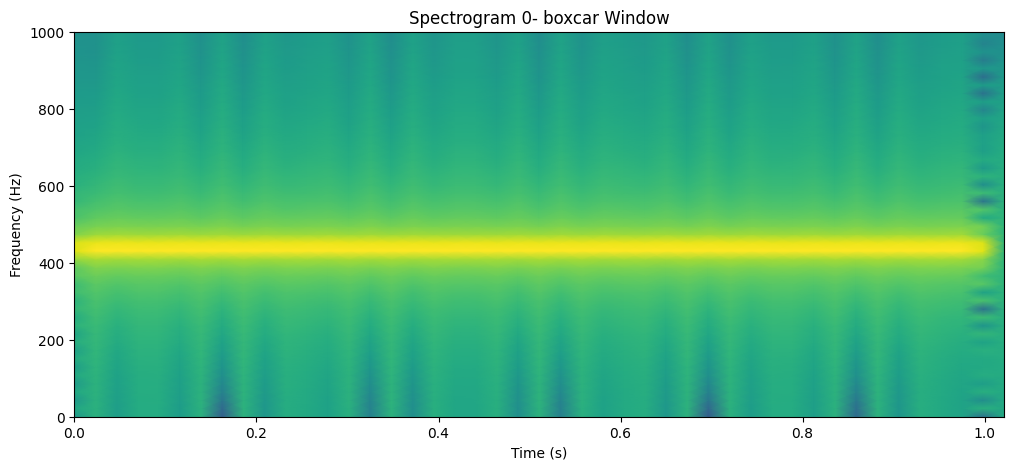

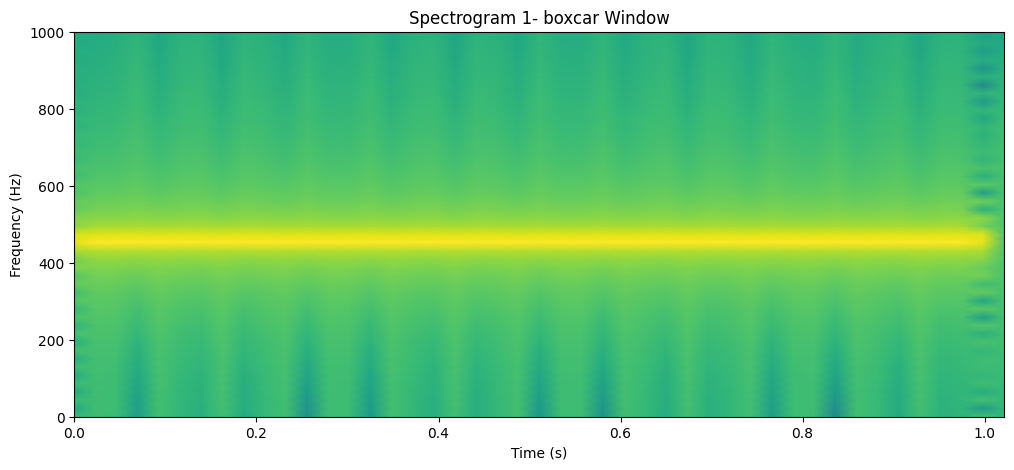

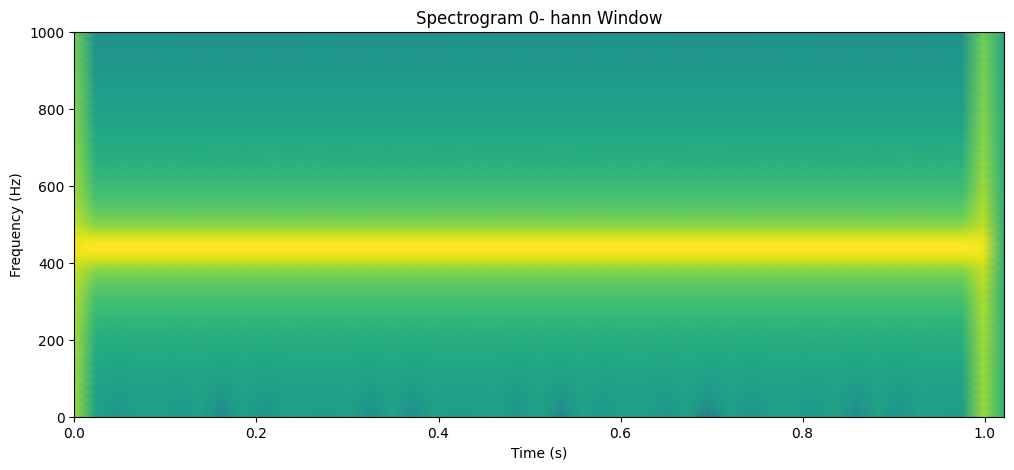

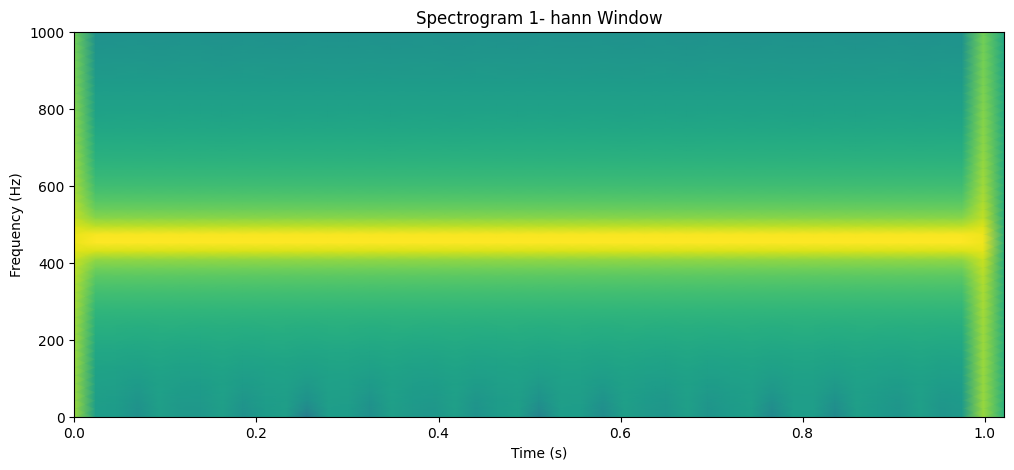

In [30]:
sr = 22050
duration = 1.0
t = np.linspace(0, duration, int(sr * duration), endpoint=False)
sine_wave_1 = [np.sin(2*np.pi*440*i) for i in t]
sine_wave_2 = [np.sin(2*np.pi*460*i) for i in t]

for window in ['boxcar', 'hann']:
    for id, sine_wave in enumerate([sine_wave_1, sine_wave_2]):
        f, t, Zxx = stft(sine_wave, sr, window=window, nperseg=1024, noverlap=512)
        Zxx = 10 * np.log10(np.abs(Zxx) + 1e-10)

        plt.figure(figsize=(12, 5))
        # librosa.display.specshow(Zxx, x_coords=t, y_coords=f, 
        #                         x_axis='linear', y_axis='linear', cmap='viridis')
        # plt.colorbar(format='%2.0f dB')

        plt.pcolormesh(t, f, Zxx, shading='gouraud')
        plt.ylim(0, 1000)
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.title(f'Spectrogram {id}- {window} Window')
        plt.show()

**Answer**: Видно что наиболее яркий цвет полосы смещается в зависимости от частоты волны. Да я могу различить волны для обоих окон.

### **2.6 Analyze a real instrument note** [1 score]
- Load a flute note (A5).
- Compute spectrograms with rectangular and Hann windows.
- **Question**: Does rectangular window create "smearing" or artificial frequencies? [0.5 score]
- **Question**: Which spectrogram better reflects the true harmonic structure? [0.5 score]

In [17]:
# Load flute note A5
row = df[(df['Instrument (in full)'] == "Flute") & (df['Pitch'] == 'A5')].iloc[0]
y_inst, sr_inst = librosa.load(row['Path'])

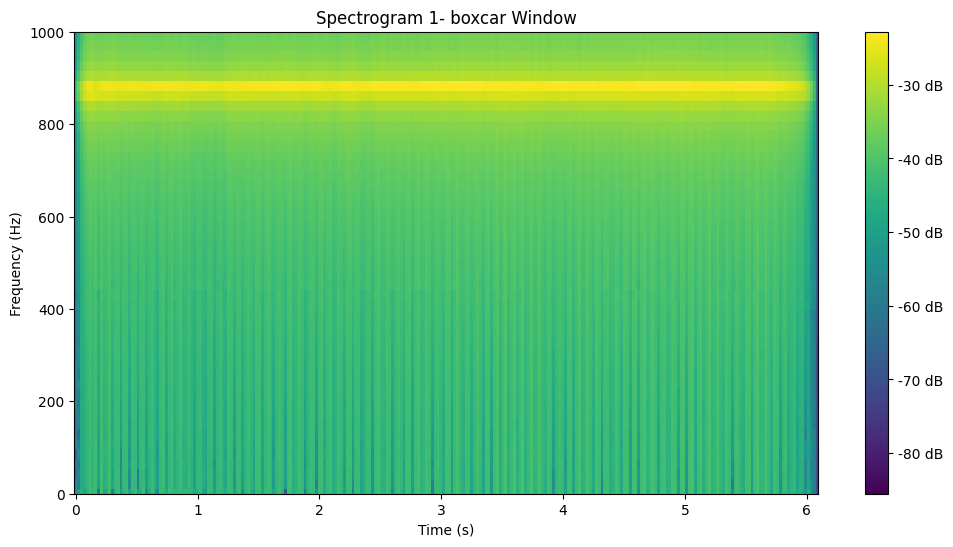

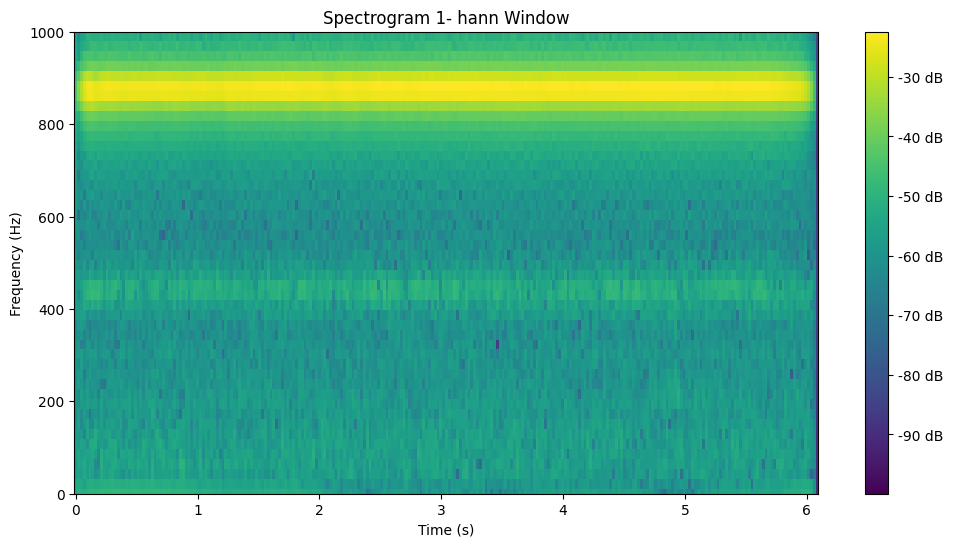

In [18]:
# Compute STFT with rectangular and hann window

for window in ['boxcar', 'hann']:
    f, t, Zxx = stft(y_inst, sr_inst, window=window, nperseg=1024, noverlap=512)
    Zxx = 10 * np.log10(np.abs(Zxx) + 1e-10)

    plt.figure(figsize=(12, 6))
    librosa.display.specshow(Zxx, x_coords=t, y_coords=f, 
                            x_axis='linear', y_axis='linear', cmap='viridis')
    plt.colorbar(format='%2.0f dB')
    plt.ylim(0, 1000)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title(f'Spectrogram {id}- {window} Window')
    plt.show()

**Answer**: Спектрограмма с прямоугольным окном создает размытие и не создает иных волн. Спектрограмма с кном Hann лучше отображает истинную гармоническую структуру т.к. "луч" более сфокусирован на главной гармонике. Так же видим, что на частоте ~440 Гц есть "волна", которая может несчти смысл (или наоборот).

### **2.7 Conclusion** [3 score]
- Write 3–4 sentences explaining:
  - What is **spectral leakage**?
  - Why does rectangular window cause it?
  - Why is a smooth (bell-shaped) window better for audio analysis?

**Answer**:

**Спектральная утечка** — это явление "растекания" энергии спектральных составляющих сигнала по соседним частотам, возникающее из-за того, что частота сигнала не совпадает точно с дискретными частотами преобразования Фурье. Она проявляется искажением спектра и появлением нежелательных боковых лепестков, которые мешают точному определению амплитуд и частот.

**Прямоугольное окно** вызывает спектральную утечку, потому что обрезает сигнал резко, создавая разрывы на границах анализируемого отрезка. Эти разрывы приводят к колебаниям и дополнительным компонентам в спектральной области, ухудшая качество спектрального анализа.

**Гладкое окно**, например окно Ханна, лучше подходит для анализа звука, так как оно плавно снижает амплитуды сигнала у краёв, уменьшая разрывы. Это сглаживание границ временного ряда снижает эффект спектральной утечки, делая спектр более чистым и сфокусированным, хотя при этом несколько расширяется основной спектральный пик.


# **Task 3: Implement Your Own Mel-Spectrogram Transform** [5 score]

### **Goal**: Understand how Mel-scale warping works by implementing it manually.

### **3.1 Load an audio file** [0.5 score]
- Pick any `.wav` from the dataset.
- Load with `librosa.load(..., sr=22050)`.

In [19]:
# Load audio
sample = df.iloc[0]
y, sr = librosa.load(sample['Path'])

### **3.2 Compute STFT** [0.5 score]
- Use `librosa.stft` with `n_fft=2048`, `hop_length=512`, `window='hann'`.
- Compute power spectrogram: `S = np.abs(stft_result) ** 2`.

In [20]:
# Compute STFT
stft_result = librosa.stft(y, n_fft=2048, win_length=512, window='hann', hop_length=512)
S = np.abs(stft_result) ** 2

### **3.3 Create Mel filterbank manually** [2 score]
- Number of Mel bands: `n_mels = 128`.
- Frequency range: 0 to `sr/2`.
- Steps:
  1. Convert Hz to Mel: `mel = 2595 * np.log10(1 + f / 700)`
  2. Create `n_mels + 2` equally spaced points in Mel scale.
  3. Convert back to Hz.
  4. Build triangular filters (each filter overlaps with neighbors).
- Output: a matrix `mel_basis` of shape `(n_mels, n_fft//2 + 1)`.

> 📚 Reference: [Librosa mel filterbank docs](https://librosa.org/doc/main/generated/librosa.filters.mel.html)

In [21]:
def hz_to_mel(frequencies):
    """Convert Hz to Mel scale"""
    return 2595.0 * np.log10(1 + frequencies / 700.0)

def mel_to_hz(mels):
    """Convert Mel to Hz scale"""
    return 700.0 * (10**(mels / 2595) - 1)

def create_mel_filterbank(sr, n_fft, n_mels=128, fmin=0.0, fmax=None):
    """Create Mel filterbank manually"""
    if fmax is None:
        fmax = float(sr) / 2
    n_mels = int(n_mels)
    # Frequency bins
    n_freqs = n_fft // 2 + 1
    linear_freqs = np.fft.rfftfreq(n=n_fft, d=1.0 / sr)

    # Mel points
    min_mel = hz_to_mel(fmin)
    max_mel = hz_to_mel(fmax)
    mel_points = np.linspace(min_mel, max_mel, n_mels + 2)
    hz_points = mel_to_hz(mel_points)

    filterbank = np.zeros((n_mels, n_freqs), dtype=np.float32)

    for m in range(n_mels):
        left_freq = hz_points[m]
        center_freq = hz_points[m+1]
        right_freq = hz_points[m+2]

        # Разность частот для градиентов
        lower_slope = -(- linear_freqs + left_freq) / (center_freq - left_freq)
        upper_slope = (- linear_freqs + right_freq) / (right_freq - center_freq)

        filterbank[m] = np.maximum(0, np.minimum(lower_slope, upper_slope))


    enorm = 2.0 / (hz_points[2 : n_mels + 2] - hz_points[:n_mels])
    filterbank *= enorm[:, np.newaxis]
    return filterbank

# Create filterbank
mel_basis = create_mel_filterbank(sr, n_fft=2048, n_mels=128, fmax=sr/2.0)

### **3.4 Apply filterbank to power spectrogram** [0.5 score]
- Compute: `mel_spec_manual = np.dot(mel_basis, S)`

In [22]:
# Apply manual filterbank
mel_spec_manual = np.dot(mel_basis, S)

### **3.5 Compute Mel-spectrogram using librosa** [0.5 score]
- Use `librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128)`

In [23]:
# Librosa version
mel_spec_librosa = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, win_length=512, hop_length=512, n_mels=128, htk=True)

### **3.6 Compare and validate** [1 score]
- Use `np.allclose(mel_spec_manual, mel_spec_librosa, atol=1e-5)`
- If not close, debug your filterbank.
- Plot both Mel-spectrograms side by side (in dB scale).
- **Question**: Are they visually identical?

Manual and librosa implementations match: True


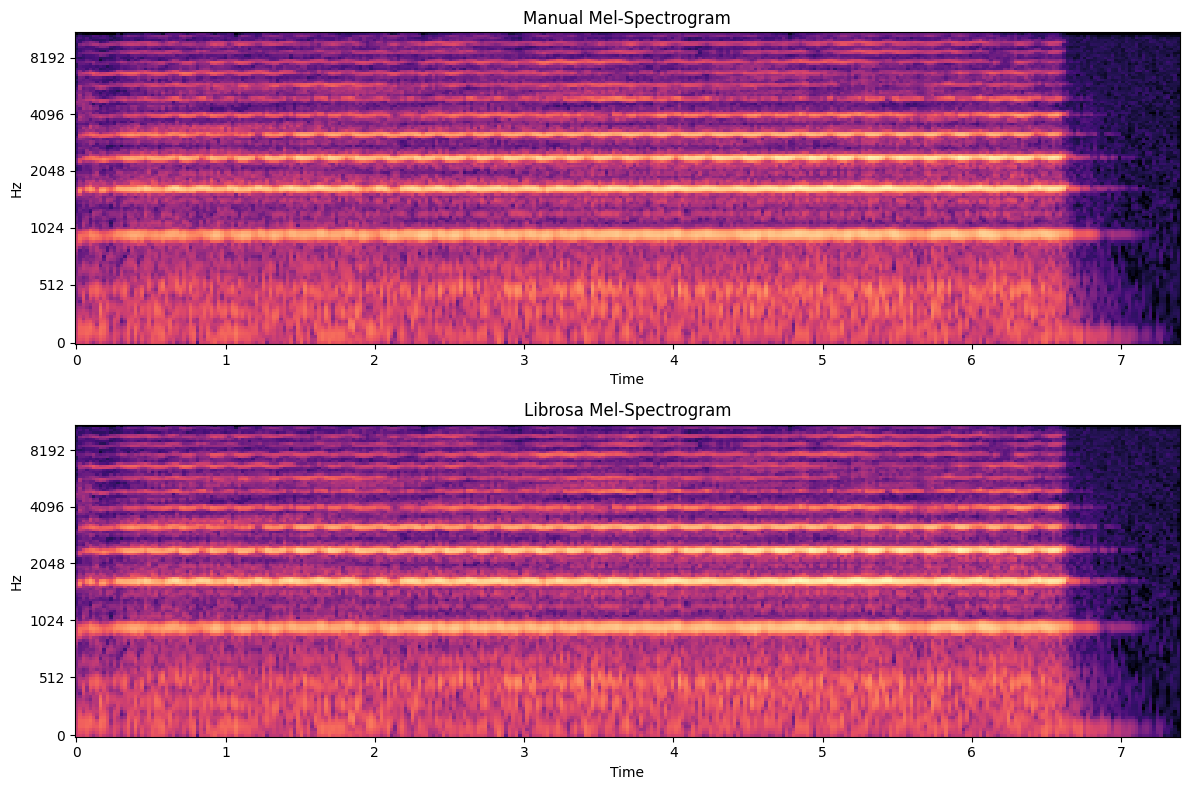

In [24]:
# Compare
are_close = np.allclose(mel_spec_manual, mel_spec_librosa, atol=1e-5)
print(f"Manual and librosa implementations match: {are_close}")

# Plot comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

librosa.display.specshow(
    librosa.power_to_db(mel_spec_manual, ref=np.max),
    sr=sr, hop_length=512, x_axis='time', y_axis='mel', ax=ax1
)
ax1.set_title('Manual Mel-Spectrogram')

librosa.display.specshow(
    librosa.power_to_db(mel_spec_librosa, ref=np.max),
    sr=sr, hop_length=512, x_axis='time', y_axis='mel', ax=ax2
)
ax2.set_title('Librosa Mel-Spectrogram')


plt.tight_layout()
plt.show()

**Answer**: Видуально и численно мелспектрограммы одинаковы

### **3.7 Bonus: Try with torchaudio**
- Repeat using `torchaudio.transforms.MelSpectrogram`.
- Compare with your implementation.

In [25]:
# !pip install torch torchaudio

In [26]:
import torchaudio
import torch
mel_transform = torchaudio.transforms.MelSpectrogram(
    sample_rate=sr, n_fft=2024, hop_length=512, n_mels=128
)
mel_spec_torch = mel_transform(torch.tensor(y)).numpy()

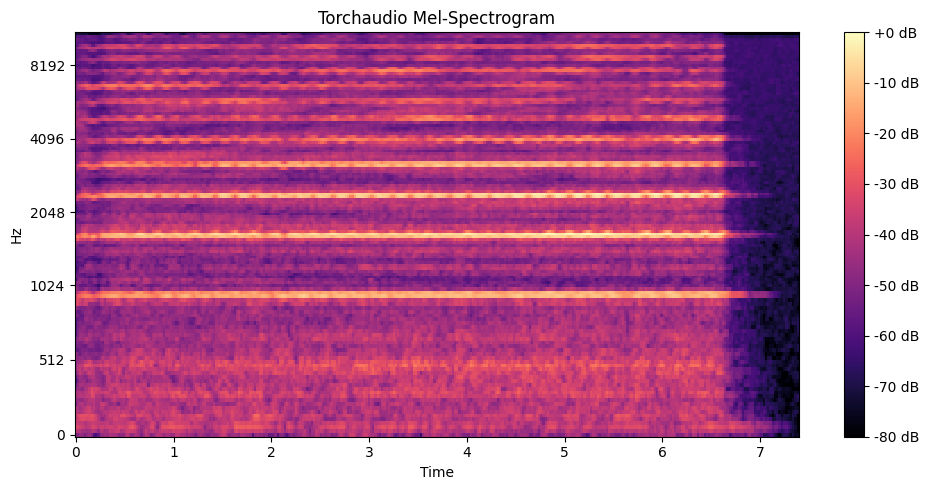

In [28]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(
    librosa.power_to_db(mel_spec_torch, ref=np.max),
    sr=sr,
    hop_length=512,
    x_axis='time',
    y_axis='mel'
)
plt.title('Torchaudio Mel-Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()